In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("housePrice_riyel.csv")
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df = df.dropna(subset=["Address"]) 
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [6]:
df = df.dropna(subset=["Address"]) 

In [7]:
df["Area"] = df["Area"].astype(str).str.replace(",", "").str.strip()
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")
df = df.dropna(subset=["Area"])

df = df[df["Area"] < 500] 
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [8]:

df["Price"] = df["Price"].astype(str).str.replace(",", "").str.strip()
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

df["Price(USD)"] = df["Price(USD)"].astype(str).str.replace(",", "").str.strip()
df["Price(USD)"] = pd.to_numeric(df["Price(USD)"], errors="coerce")

df = df.dropna(subset=["Price", "Price(USD)"])  
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [9]:

df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


## test someying


In [ ]:
print(df.columns)


In [ ]:
df.columns = df.columns.str.strip()  

In [ ]:
print(df.head()) 



In [ ]:
print(df["Address"].isna().sum()) 


In [ ]:
df = pd.get_dummies(df, columns=["Address"])
df

## test ather something

In [10]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


In [11]:
address_prices = df.groupby("Address")["Price"].mean()
df["Address"] = df["Address"].map(address_prices)


In [12]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,2.985754e+09,1.850000e+09,61666.67
1,60,1,1,1,1,2.985754e+09,1.850000e+09,61666.67
2,79,2,1,1,1,7.778219e+08,5.500000e+08,18333.33
3,95,2,1,1,1,9.009217e+08,9.025000e+08,30083.33
4,123,2,1,1,1,1.196988e+10,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3.178452e+09,3.500000e+09,116666.67
3475,83,2,1,1,1,1.989321e+10,6.800000e+09,226666.67
3476,75,2,0,0,0,5.235906e+08,3.650000e+08,12166.67
3477,105,2,1,1,1,1.367083e+10,5.600000e+09,186666.67


In [ ]:

# df["Address"] = df["Address"].astype("category").cat.codes
# df

In [13]:
df = df.drop(columns=["Warehouse", "Elevator"])


In [15]:
X = df[["Area", "Room", "Parking", "Address"]]
# y = df[ "Price(USD)"] 
y = df["Price"]
df

,Area,Room,Parking,Address,Price,Price(USD)
0,63,1,1,2.985754e+09,1.850000e+09,61666.67
1,60,1,1,2.985754e+09,1.850000e+09,61666.67
2,79,2,1,7.778219e+08,5.500000e+08,18333.33
3,95,2,1,9.009217e+08,9.025000e+08,30083.33
4,123,2,1,1.196988e+10,7.000000e+09,233333.33
...,...,...,...,...,...,...
3474,86,2,1,3.178452e+09,3.500000e+09,116666.67
3475,83,2,1,1.989321e+10,6.800000e+09,226666.67
3476,75,2,0,5.235906e+08,3.650000e+08,12166.67
3477,105,2,1,1.367083e+10,5.600000e+09,186666.67


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R² Score: {r2}")


MAE: 1924688502.8104517
R² Score: 0.6763818268473293


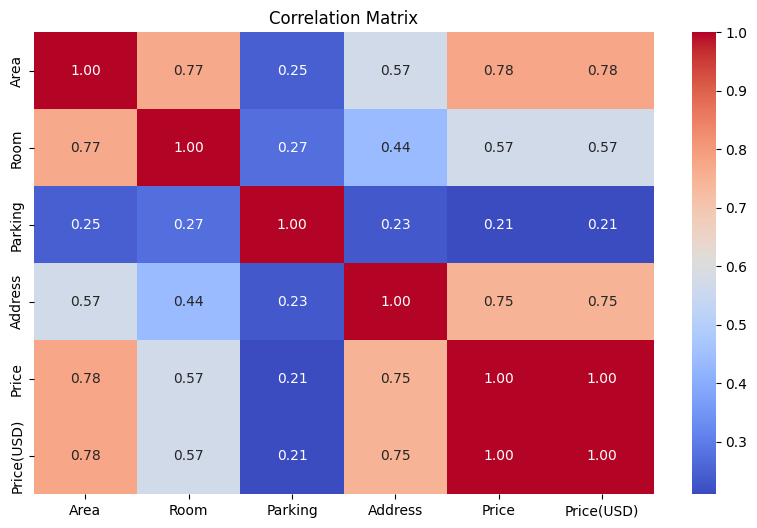

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# test


In [20]:
df

,Area,Room,Parking,Address,Price,Price(USD)
0,63,1,1,2.985754e+09,1.850000e+09,61666.67
1,60,1,1,2.985754e+09,1.850000e+09,61666.67
2,79,2,1,7.778219e+08,5.500000e+08,18333.33
3,95,2,1,9.009217e+08,9.025000e+08,30083.33
4,123,2,1,1.196988e+10,7.000000e+09,233333.33
...,...,...,...,...,...,...
3474,86,2,1,3.178452e+09,3.500000e+09,116666.67
3475,83,2,1,1.989321e+10,6.800000e+09,226666.67
3476,75,2,0,5.235906e+08,3.650000e+08,12166.67
3477,105,2,1,1.367083e+10,5.600000e+09,186666.67


In [21]:
address_mean_price = df.groupby("Address")["Price"].mean()  
df["Address_Encoded"] = df["Address"].map(address_mean_price)
df = df.drop(columns=["Address"])  


In [22]:
df["Area_per_Room"] = df["Area"] / df["Room"]
df["Parking_Ratio"] = df["Parking"] / df["Room"]


In [23]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Price"] >= Q1 - 1.5 * IQR) & (df["Price"] <= Q3 + 1.5 * IQR)]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Polynomial Regression


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² Score (Polynomial Regression): {r2_poly}")


R² Score (Polynomial Regression): 0.8041685438935173


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score (Random Forest): {r2_rf}")


R² Score (Random Forest): 0.8002018159808884


## XGBoost


In [27]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² Score (XGBoost): {r2_xgb}")


R² Score (XGBoost): 0.7797167484299679


# RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² Score (RandomForestRegressor): {r2_xgb}")

R² Score (RandomForestRegressor): 0.7797167484299679
